# HMM

In [73]:
import pandas as pd
import numpy as np
from hmmlearn.hmm import GaussianHMM
from matplotlib import pyplot as plt

In [74]:
# Load data from CSV file
data = pd.read_csv('../data/TSLA.csv')
data.head()

,Date,Open,High,Low,Close,Volume,Symbol,YTD Gains
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,281494500,TSLA,0.000000
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,257806500,TSLA,-0.002511
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,123282000,TSLA,-0.080787
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,77097000,TSLA,-0.196317
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,103003500,TSLA,-0.325659


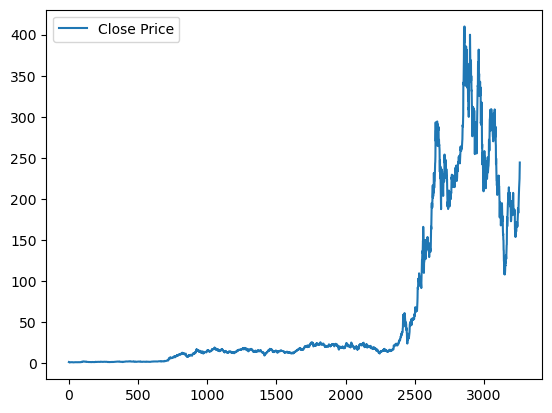

In [75]:
# Extract the close price which will be used as the observation data
close_price = data['Close'].values
close_price = close_price.reshape(-1, 1)
plt.plot(close_price, label='Close Price')
plt.legend()
plt.show()

In [76]:
# Define training data set
train_data = close_price[1000:1500]

# Define test data set
test_data = close_price[1500:1650]

In [77]:
# Define the model
ghmm = GaussianHMM(n_components=3, covariance_type="diag", n_iter=1000)

In [78]:
# Train the model on the first training data set
ghmm.fit(train_data)

GaussianHMM(n_components=3, n_iter=1000)

In [79]:
# Predict the most likely sequence of hidden states
hidden_states = ghmm.predict(test_data)
print(hidden_states)

[2 2 2 2 2 2 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


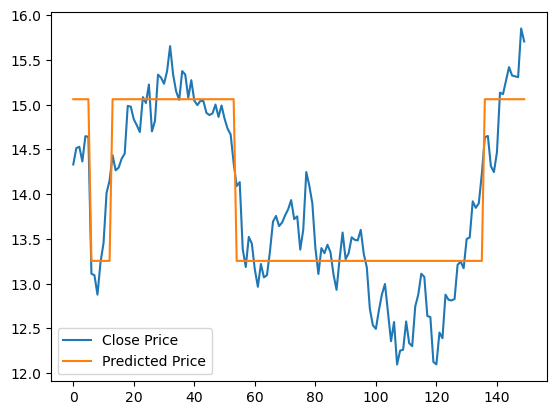

In [80]:
predicted_price = [ghmm.means_[z] for z in hidden_states]
plt.plot(test_data, label='Close Price')
plt.plot(predicted_price, label='Predicted Price')
plt.legend()
plt.show()

In [81]:
# RMSE
rmse = np.sqrt(np.mean((predicted_price[0] - test_data) ** 2))
print('RMSE:', rmse)

RMSE: 1.5082099240593567
